In [ ]:
import pandas as pd 
import pandas_profiling as pp
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn import tree
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, roc_curve
from matplotlib import pyplot as plt

In [ ]:
# reading datasets
df1 = pd.read_csv('red_wine.csv')
df2 = pd.read_csv('white_wine.csv')

len(df1)

571

Question 1 : 
Read  red-wine.csv into Python as a data frame, use a pandas profiling tool (https://github.com/pandas-profiling/pandas-profiling) to create an HTML file, and paste a screenshot of the HTML file here (10 points)

In [ ]:
# profiling
df1_profile = df1.profile_report()
df1_profile

# export the profile
df1_profile.to_file('red_wine.csv.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# remove duplicates
df1 = df1.drop_duplicates(keep = 'last')
len(df1)

556

Question 2 : 
  Repeat the same experiments in WEKA Question 2,  and report the same metrics as in Question 2. To receive full credit, you will need to write a script to assemble the result as above in the form of Pandas data frame. Paste a screenshot of your result from your Python notebook here. Please make sure that there is a reasonable number of significant digits in reporting your output. (20 points)


In [14]:
# split train test
df1.loc[:, 'type'] = LabelEncoder().fit_transform(df1['type'])
df1.head()

,citric acid,sulphates,alcohol,type
0,0.49,0.63,8.0,1
1,0.66,0.57,8.3,1
2,0.23,0.44,8.5,0
3,0.44,0.84,8.6,1
4,0.08,0.50,8.7,1


In [15]:
X = df1.drop('type', axis = 1)
X.head()

,citric acid,sulphates,alcohol
0,0.49,0.63,8.0
1,0.66,0.57,8.3
2,0.23,0.44,8.5
3,0.44,0.84,8.6
4,0.08,0.50,8.7


In [20]:
X.shape 

(556, 3)

In [21]:
y = df1['type']
y.head(10)


0    1
1    1
2    0
3    1
4    1
5    1
6    1
7    1
8    0
9    0
Name: type, dtype: int64

In [22]:
y.shape

(556,)

In [23]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [25]:
print ("X_train: ", X_train.shape)
print ("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test ", y_test.shape)

X_train:  (444, 3)
y_train:  (444,)
X_test:  (112, 3)
y_test  (112,)


Zero R

In [26]:
#using kfold 
k = 10
kf = KFold(n_splits=k, random_state=None)

dummy_clf = DummyClassifier(strategy = 'most_frequent')
dummy_clf.fit(X_train, y_train)
dummy_clf.predict(X_train)

#k-fold cross validation
ZeroR_result = cross_val_score(dummy_clf, X_test, y_test, cv = kf)

print("ZeroR Accuracy ", 100-(ZeroR_result.mean()*100))

ZeroR Accuracy  52.727272727272734


One R

oneR algorith generates one rule for each attribute, then selects the rule with smallesttotal error as its "one rule". So I wrote a function that constructs a frequency table for each attribute.

In [27]:
class OneR(object):
    
    def __init__(self):
        self.ideal_variable = None
        self.max_accuracy = 0
    
    def fit(self, X, y):
        response = list()
        result = dict()
        
        dfx = pd.DataFrame(X)
        
        for i in dfx:
            result[str(i)] = dict()
            options_values = set(dfx[i])
            join_data = pd.DataFrame({"variable":dfx[i], "label":y})
            cross_table = pd.crosstab(join_data.variable, join_data.label)
            summary = cross_table.idxmax(axis=1)
            result[str(i)] = dict(summary)
            
            counts = 0
            
            for idx, row in join_data.iterrows():
                if row['label'] == result[str(i)][row['variable']]:
                    counts += 1

            accuracy = (counts/len(y))
            
            if accuracy > self.max_accuracy:
                self.max_accuracy = accuracy
                self.ideal_variable = i

            result_feature = {"variable": str(i), "accuracy":accuracy, "rules": result[str(i)] }  
            response.append(result_feature)
            
        return response

    
    def predict(self, X=None):
        self_ideal_variable = self.ideal_variable + 1
        
    def __repr__(self):
        if self.ideal_variable != None:
            txt = "The best variable for the data set is : " + str(self.ideal_variable)
        else:
            txt = "The best variable has not been found yet, try executing the fit method beforehand "
        return txt

In [28]:
clf = OneR()
results = clf.fit(X, y)

print(results)
print(clf)

[{'variable': 'citric acid', 'accuracy': 0.7410071942446043, 'rules': {0.0: 1, 0.01: 1, 0.02: 1, 0.03: 1, 0.04: 0, 0.05: 1, 0.06: 1, 0.07: 1, 0.08: 1, 0.09: 1, 0.1: 1, 0.11: 0, 0.12: 0, 0.13: 0, 0.14: 0, 0.15: 0, 0.16: 0, 0.17: 0, 0.18: 0, 0.19: 0, 0.2: 0, 0.21: 0, 0.22: 0, 0.23: 0, 0.24: 0, 0.25: 0, 0.26: 0, 0.27: 0, 0.28: 0, 0.29: 0, 0.3: 0, 0.31: 0, 0.32: 0, 0.33: 0, 0.34: 0, 0.35: 0, 0.36: 0, 0.37: 0, 0.38: 0, 0.39: 1, 0.4: 1, 0.41: 1, 0.42: 0, 0.43: 1, 0.44: 0, 0.45: 1, 0.46: 1, 0.47: 1, 0.48: 1, 0.49: 0, 0.5: 1, 0.51: 0, 0.52: 1, 0.53: 1, 0.54: 1, 0.55: 0, 0.56: 1, 0.57: 1, 0.58: 1, 0.59: 0, 0.6: 0, 0.62: 0, 0.63: 1, 0.64: 1, 0.66: 1, 0.68: 1, 0.71: 1, 0.72: 0, 0.73: 1, 0.74: 0, 0.75: 1, 0.76: 1, 0.88: 0, 1.0: 1}}, {'variable': 'sulphates', 'accuracy': 0.8039568345323741, 'rules': {0.25: 0, 0.28: 0, 0.3: 0, 0.31: 0, 0.32: 0, 0.33: 0, 0.34: 0, 0.35: 0, 0.36: 0, 0.37: 0, 0.38: 0, 0.39: 0, 0.4: 0, 0.41: 0, 0.42: 0, 0.43: 0, 0.44: 0, 0.45: 0, 0.46: 0, 0.47: 0, 0.48: 0, 0.49: 0, 0.5: 

In [29]:
#since sulphates is the best variable I created a dataset that only included sulphates as an attribute
data = pd.read_csv('red_wine_sulphates.csv')
num = 10
clf_sulphates = OneR()
accuracy_items = list()

for i in range(num):
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.2,
        random_state=0)

    clf_sulphates.fit(X_train, y_train)
    accuracy_items.append(clf_sulphates.max_accuracy)

print("OneR accuracy: {}".format(100 *(sum(accuracy_items) / num)))

OneR accuracy: 80.18018018018019


Logistic Regression

In [31]:
#using kfold 
k = 10
kf = KFold(n_splits=k, random_state=None)

#modeling
model_lr = LogisticRegression(random_state= 0, max_iter = 1000)
model_lr.fit(X_train,y_train)

#k-fold cross validation
LR_result = cross_val_score(model_lr, X_test, y_test, cv = kf)

print("Logistic Regression accuracy: {}".format(LR_result.mean()*100))

#prediction probabilities 
prob = [0 for _ in range(len(y_test))]
lr_probs = model_lr.predict_proba(X_test)

#keep postive outcomes 
lr_probs = lr_probs[:, 1]

#calculate AUROC
lr_auc = roc_auc_score(y_test, lr_probs)
print('Logistic Regression AUC: ', lr_auc)

Logistic Regression accuracy: 76.74242424242424
Logistic Regression AUC:  0.8991060025542784


Naive Bayes 

In [32]:
#using kfold 
k = 10
kf = KFold(n_splits=k, random_state=None)

model_NB = GaussianNB() 
model_NB.fit(X_train, y_train)
NB_result = cross_val_score(model_NB, X_test, y_test, cv = kf)

print("Naive Bayes accuracy: {}".format(NB_result.mean()*100))

#prediction probabilities 
prob = [0 for _ in range(len(y_test))]
NB_probs = model_NB.predict_proba(X_test)

#keep postive outcomes 
NB_probs = NB_probs[:, 1]

#calculate AUROC
NB_auc = roc_auc_score(y_test, NB_probs)
print('Naive Bayes AUC: ', NB_auc)

Naive Bayes accuracy: 84.77272727272727
Naive Bayes AUC:  0.8863346104725415


Decision Trees

In [33]:
#using kfold 
k = 10
kf = KFold(n_splits=k, random_state=None)

#modeling
model_tree = tree.DecisionTreeClassifier() 
model_tree = model_tree.fit(X_train,y_train)

#k-fold cross validation
tree_result = cross_val_score(model_lr, X_test, y_test, cv = kf)

print("Decision Tree accuracy: {}".format(tree_result.mean()*100))

#prediction probabilities 
prob = [0 for _ in range(len(y_test))]
tree_probs = model_tree.predict_proba(X_test)

#keep postive outcomes 
tree_probs = tree_probs[:, 1]

#calculate AUROC
tree_auc = roc_auc_score(y_test, tree_probs)
print('Decision Tree AUC: ', tree_auc)

Decision Tree accuracy: 76.74242424242424
Decision Tree AUC:  0.7953384418901661


SVM

In [34]:
#using kfold 
k = 10
kf = KFold(n_splits=k, random_state=None)

model_SVM =svm.SVC(kernel='poly', C=2, degree = 3, tol = 1e-3, max_iter = -1, coef0 = 0.05, gamma = 0.1 , probability = True)
model_SVM.fit(X_train,y_train)
SVM_result = cross_val_score(model_SVM, X_test, y_test, cv = kf)

print("SVM accuracy: {}".format(SVM_result.mean()*100))

#prediction probabilities 
prob = [0 for _ in range(len(y_test))]
SVM_probs = model_SVM.predict_proba(X_test)

#keep postive outcomes 
SVM_probs = SVM_probs[:, 1]

#calculate AUROC
SVM_auc = roc_auc_score(y_test, SVM_probs)
print('SVM AUC: ', SVM_auc)

SVM accuracy: 83.93939393939395
SVM AUC:  0.9067688378033206


Random Forest

In [35]:
#using kfold 
k = 10
kf = KFold(n_splits=k, random_state=None)

model_rf = RandomForestClassifier(max_depth = 3, random_state = 0)
model_rf.fit(X_train,y_train)
RF_result = cross_val_score(model_rf, X_test, y_test, cv = kf)

print("Random Forest accuracy: {}".format(RF_result.mean()*100))

#prediction probabilities 
prob = [0 for _ in range(len(y_test))]
rf_probs = model_rf.predict_proba(X_test)

#keep postive outcomes 
rf_probs = rf_probs[:, 1]

#calculate AUROC
rf_auc = roc_auc_score(y_test, rf_probs)
print('Random Forest AUC: ', rf_auc)

Random Forest accuracy: 86.66666666666666
Random Forest AUC:  0.9179438058748404


Final Results

In [36]:
print("ZeroR Accuracy ", 100-(ZeroR_result.mean()*100))
print("OneR accuracy: {}".format(100 *(sum(accuracy_items) / num)), "\n")

print("Logistic Regression accuracy: {}".format(LR_result.mean()*100))
print('Logistic Regression AUC: ', lr_auc, "\n")

print("Naive Bayes accuracy: {}".format(NB_result.mean()*100))
print('Naive Bayes AUC: ', NB_auc, "\n")

print("Decision Tree accuracy: {}".format(tree_result.mean()*100))
print('Decision Tree AUC: ', tree_auc, "\n")

print("SVM accuracy: {}".format(SVM_result.mean()*100))
print('SVM AUC: ', SVM_auc, "\n")

print("Random Forest accuracy: {}".format(RF_result.mean()*100))
print('Random Forest AUC: ', rf_auc)

ZeroR Accuracy  52.727272727272734
OneR accuracy: 80.18018018018019 

Logistic Regression accuracy: 76.74242424242424
Logistic Regression AUC:  0.8991060025542784 

Naive Bayes accuracy: 84.77272727272727
Naive Bayes AUC:  0.8863346104725415 

Decision Tree accuracy: 76.74242424242424
Decision Tree AUC:  0.7953384418901661 

SVM accuracy: 83.93939393939395
SVM AUC:  0.9067688378033206 

Random Forest accuracy: 86.66666666666666
Random Forest AUC:  0.9179438058748404


Question 3 : Plot the ROC curve of the Random Forest classifier from the Python package, and paste a screenshot of your ROC curve here (10 points)


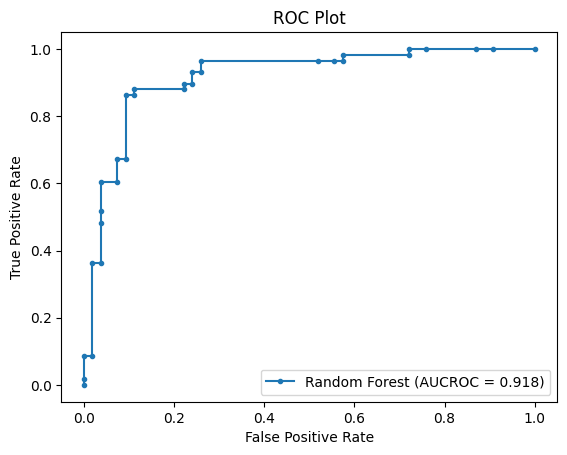

In [37]:
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

plt.plot(rf_fpr, rf_tpr, marker = '.', label = 'Random Forest (AUCROC = %0.3f)' % rf_auc)

#title 
plt.title('ROC Plot')
#Axis Label 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#Show Legent 
plt.legend()
#Show plot 
plt.show()

Question 4 : Using the best model obtained above in Q2 (python)  and running the model on white-wine.csv and reporting the AUC score, comment on the performance. (5 points)


In [38]:
#train test split white_wine.csv
X = df2.drop('type', axis = 1)
X.head()

,citric acid,sulphates,alcohol
0,0.24,0.52,9.4
1,0.49,0.56,9.4
2,0.66,0.73,10.0
3,0.32,0.77,10.0
4,0.38,0.82,10.0


In [39]:
X.shape

(78, 3)

In [40]:
y = df2['type']
y.head(10)

0     low
1     low
2     low
3     low
4     low
5     low
6    high
7    high
8    high
9    high
Name: type, dtype: object

In [41]:
y.shape

(78,)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print ("X_train: ", X_train.shape)
print ("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test ", y_test.shape)

X_train:  (62, 3)
y_train:  (62,)
X_test:  (16, 3)
y_test  (16,)


In [43]:
#prediction probabilities 
prob = [0 for _ in range(len(y_test))]
rf_probs = model_rf.predict_proba(X_test)

#keep postive outcomes 
rf_probs = rf_probs[:, 1]

#calculate AUROC
rf_auc = roc_auc_score(y_test, rf_probs)
print('Random Forest AUC: ', rf_auc)

Random Forest AUC:  0.923076923076923
